<a href="https://colab.research.google.com/github/JakeOh/202011_itw_pyml_wkd/blob/main/ml01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신 러닝의 일반적인 과정

* 문제 정의/파악, 큰 그림 파악
* 데이터 수집
* 데이터 탐색 - 시각화
* 데이터 전처리 - NA 처리, 이상치 처리, 파생 변수 생성, 특성 제외, 숫자형/카테고리형 데이터 변환, ...
* 머신 러닝 알고리즘 선택, 훈련(학습)
* 알고리즘 세부 튜닝 - 하이퍼 파라미터(hyper-parameter) 조정
* 알고리즘 성능 측정 - 평가
* 상용화

In [2]:
# 필요한 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 코드 셀 실행: Ctrl+Enter
# 코드 셀 실행 후 다음 코드 셀로 커서 이동: Shift+Enter

In [3]:
# github에 저장된 CSV(comma-separated values) 파일 위치
file_path = 'https://github.com/ageron/handson-ml2/raw/master/datasets/housing/housing.csv'

In [4]:
# github의 파일을 읽어서 DataFrame을 생성
housing_df = pd.read_csv(file_path)

In [5]:
# DataFrame의 첫 5개 데이터를 출력
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [7]:
housing_df.info()
# 데이터 프레임의 정보: 샘플(row) 개수, 변수/특성(column) 이름/개수/데이터 타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing_df.describe()
# 숫자형 변수(특성, 컬럼)들의 기술 통계 요약값

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing_df['ocean_proximity'].value_counts()
# 문자형/카테고리형 데이터의 요약: 카테고리별 데이터 개수

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

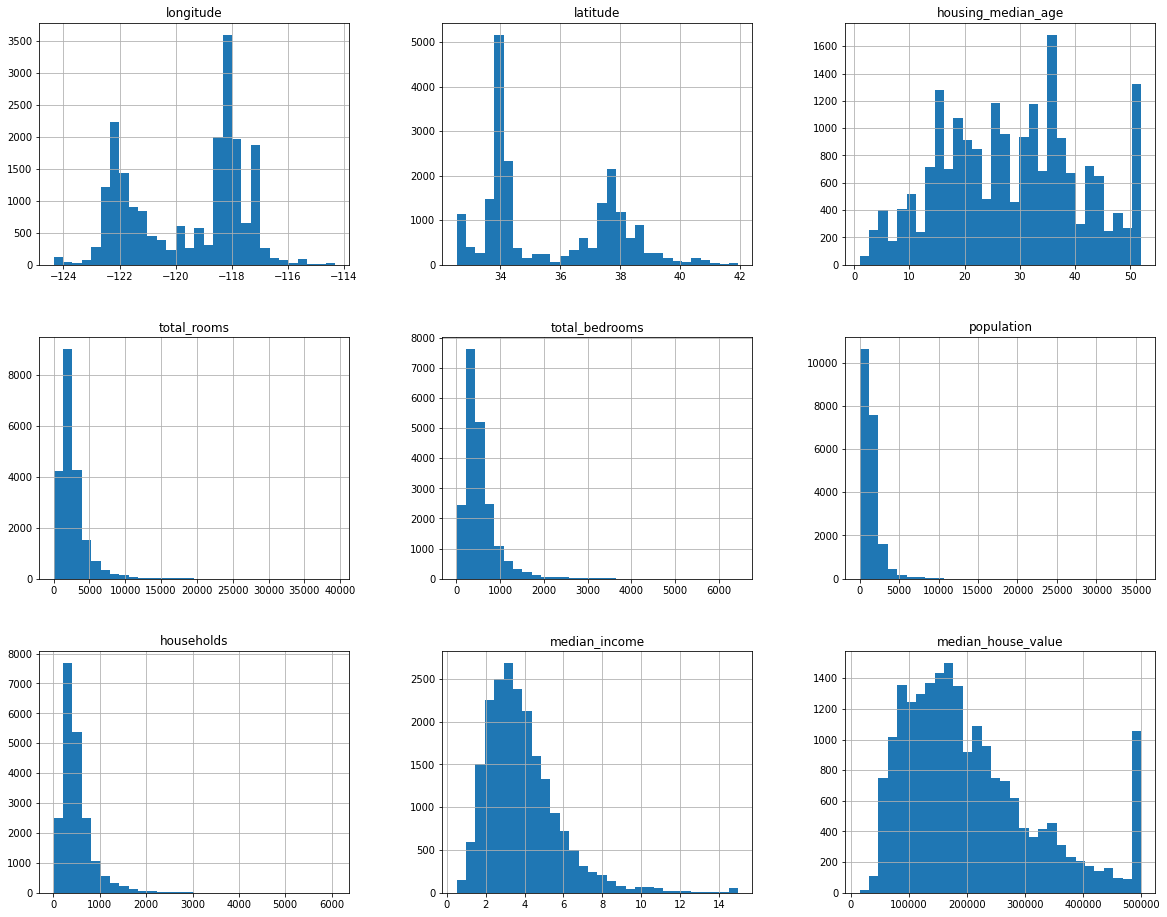

In [14]:
# 숫자형 데이터들의 분포 - 히스토그램(histogram)
housing_df.hist(figsize=(20, 16), bins=30)
plt.show()